<a href="https://colab.research.google.com/github/zhaishu2008/UTS_ML2019_ID12450108/blob/master/SVM_LBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# encoding: utf-8

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# importing a module for splitting a dataset into train, and test
from sklearn.model_selection import train_test_split
from sklearn import svm 
# confusion metric
from sklearn import metrics
from skimage import feature
import cv2
import seaborn as sns

## **Connect to My Drive**



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [0]:
cd /content/gdrive/My Drive/data/assessment !

/content/gdrive/My Drive/data/assessment !


In [0]:
ls

 ANN.ipynb
'Handcrafted Feature Extraction_ Part-1.ipynb'
'Handcrafted Feature Extraction_ Part-1-Solution.ipynb'
'Handcrafted Feature Extraction_ Part-2-Solution.ipynb'
 KNN-HOG.ipynb
 knn-LBP.ipynb
 LogisticRegression-NeuralNetwork-Part-1-Solution.ipynb
 Mnist/
'Python-additional-warmup-solution(1).ipynb'
 SVM-HOG.ipynb
 SVM-LBP.ipynb
 t10k-images-idx3-ubyte/
 t10k-images-idx3-ubyte.gz
 t10k-labels-idx1-ubyte/
 t10k-labels-idx1-ubyte.gz
 train-images-idx3-ubyte/
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte/
 train-labels-idx1-ubyte.gz
 Week3-Lab2-EdgeDetection-Solution.ipynb
 Week3-Lab2-MachineLearning-Solution.ipynb
 Week5-LogisticRegression-NeuralNetwork-Part-2-Solution.ipynb
'Week6-ConvolutionalNeuralNetworks(CNNs)-Solution.ipynb'


In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/data/assessment !', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/data/assessment !', kind='t10k')
# initialize the label names from Fashion MNIST github repository

labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


In [0]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


Visualization of Dataset

top
trouser
sneaker
dress


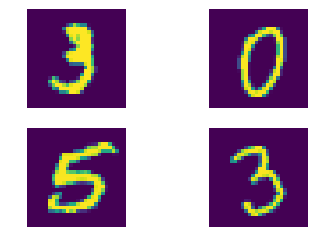

In [0]:
# view few images and print its corresponding label
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

 Local Binary Patterns (LBP) class definition for LBP feature extraction

In [0]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

LBP feature extraction for the whole training dataset

In [0]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the image, convert it to grayscale, and extract LBP features
	image = (X_train[img_index])
	hist = desc.LBPfeatures(image)
 
	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(y_train[img_index])
	data_train.append(hist)
  
print(np.shape(data_train))
print(np.shape(labels_train))

(60000, 26)
(60000,)


SVM Train

Step-1: Train SVM Classifier using the training dataset

In [0]:
model = svm.SVC(kernel='rbf',C=1.0, random_state=100) # rbf Kernel
# Start training the SVM classifier 
model.fit(data_train, labels_train)

print(np.shape(data_train))
print(np.shape(labels_train))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(60000, 26)
(60000,)


In [0]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.10


Step-2: Evaluation of trained SVM model on test dataset

In [0]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier
for im_index in range(len(X_test)):
  imag = X_test[im_index]
  # Extract LBP feature
  histo = desc.LBPfeatures(imag)
  # Perform classification
  prediction = model.predict(histo.reshape(1, -1))
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(y_test[im_index])

In [0]:
accuracy = metrics.accuracy_score(predict_label, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.0988


[[  10    0    0    9  104    0  464    0  393    0]
 [   1    0    0    0    0    0 1134    0    0    0]
 [  30    0    0    1  155    0  807    0   39    0]
 [   4    0    0    7  115    0  771    0  113    0]
 [   0    0    0    1   35    0  921    0   25    0]
 [  10    0    0    3   63    0  748    0   68    0]
 [  12    0    0    5   88    0  767    0   86    0]
 [   2    0    0    0   15    0 1010    0    1    0]
 [   8    0    0    1   80    0  716    0  169    0]
 [   1    0    0    5   10    0  940    0   53    0]]


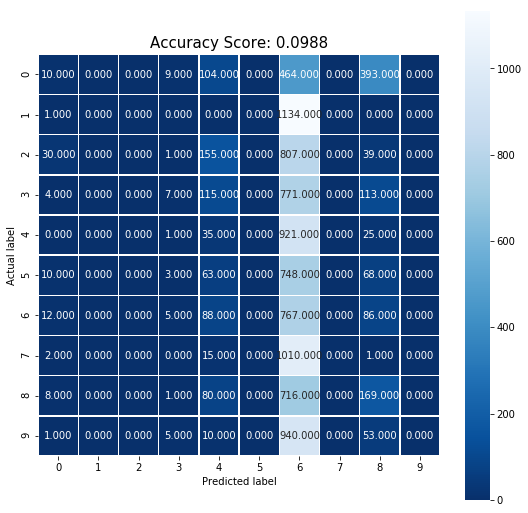

In [0]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(predict_label, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [0]:
# Display the some classification result on test samples
images = []
 
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  histog = desc.LBPfeatures(X_test[i])
  prediction = model.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [0]:
np.shape(images[1])

(96, 96, 3)

coat


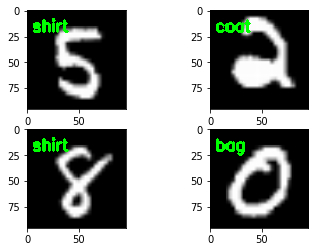

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])